# Analisis Data E-Commerce TechHub

## Table of Contents
1. [Introduction](#introduction)
2. [Data Loading](#data-loading)
3. [Pembersihan Data](#pembersihan-data)
4. [Exploratory Data Analysis (EDA)](#exploratory-data-analysis-eda)
5. [Ringkasan Bulanan, Triwulan, dan Tahunan](#ringkasan-bulanan-triwulan-dan-tahunan)
6. [Analisis Regional dan Program Loyalti](#analisis-regional-dan-program-loyalti)
7. [Analisis Performa Produk](#analisis-performa-produk)



---

## Introduction
- **Tujuan**: Tujuan dari proyek ini adalah untuk menganalisis data penjualan TechHub pada periode 2020-2023, dengan fokus utama pada identifikasi tren penjualan, evaluasi kinerja produk di berbagai wilayah, serta analisis perilaku pelanggan dan saluran penjualan yang digunakan. Dengan menggali informasi lebih dalam pada area-area ini, proyek ini bertujuan memberikan TechHub wawasan yang dapat diimplementasikan untuk mengoptimalkan penawaran produk, meningkatkan keterlibatan pelanggan melalui program loyalitas, dan memperbaiki strategi pemasaran demi mencapai pertumbuhan penjualan yang berkelanjutan.
- **Dataset**: Pengerjaan projek ini menggunakan satu jenis dataset: 
  1. order_data.csv: Dataset ini mencakup catatan pesanan individual, waktu pembelian, detail produk, informasi pelanggan, serta status pesanan. Dataset ini memberikan data yang diperlukan untuk menganalisis tren penjualan dan loyalitas pelanggan.


---

## Data Loading
Melakukan loading data yang diperlukan dalam analisis

In [1]:
#Import library
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
# Style dan format

# Apply the Seaborn style
plt.style.use('seaborn-v0_8-deep')
# Disable scientific notation
pd.options.display.float_format = '{:.0f}'.format

In [3]:
#Read data
df = pd.read_csv("order_data.csv")

Menampilkan beberapa baris pertama dari data untuk memastikan data telah berhasil dimuat dan untuk menganalisis struktur data.

In [4]:
df.head(10)

,USER_ID,ORDER_ID,PURCHASE_TS,SHIP_TS,DELIVERY_TS,PRODUCT_NAME,PRODUCT_ID,USD_PRICE,LOCAL_PRICE,CURRENCY,PURCHASE_PLATFORM,MARKETING_CHANNEL,ACCOUNT_CREATION_METHOD,COUNTRY_CODE,LOYALTY_PROGRAM,CREATED_ON
0,945000,yumkgsnwdkm,2020-01-22,2020-01-28,2020-01-30,Mini Projector,iwfz,209,216,GBP,mobile app,social media,desktop,US,1,2017-07-19
1,392000,1nlkewfizjj,2020-01-19,2020-01-25,2020-02-04,Full HD Webcam,ni9u,661,679,USD,desktop app,email,mobile,GB,0,2018-09-09
2,119000,9jfiabyaz6b,2020-01-23,2020-01-27,2020-01-31,Network Switch,iwd9,890,901,AUD,mobile app,ads,mobile,US,1,2019-04-24
3,331000,97fyoqwc8b7,2020-01-28,2020-02-02,2020-02-03,Wireless Charger,8pq6,812,832,AUD,mobile app,social media,desktop,FR,1,2019-11-10
4,419000,tzdhn73p46o,2020-01-30,2020-02-06,2020-02-11,Bluetooth Speaker,i03k,889,904,USD,desktop app,email,desktop,DE,0,2017-09-21
5,772000,nq3pqy74htr,2020-01-15,2020-01-22,2020-01-29,Full HD Webcam,ni9u,130,150,AUD,website,social media,mobile,FR,1,2019-07-12
6,748000,xyhz43mrg6v,2020-01-29,2020-02-05,2020-02-15,Power Bank,xlw7,911,929,JPY,desktop app,email,desktop,JP,0,2019-03-23
7,251000,gu97bp9au18,2020-01-06,2020-01-09,2020-01-14,Bluetooth Speaker,i03k,81,99,USD,mobile app,ads,desktop,CA,1,2018-04-18
8,907000,909ulu1zryy,2020-01-06,2020-01-08,2020-01-17,Office Chair,8yut,951,958,GBP,mobile app,email,desktop,ZA,0,2018-05-16
9,964000,e0zqa4bxmv7,2020-01-28,2020-01-30,2020-02-02,Dash Cam,gpls,992,1006,GBP,mobile app,direct,mobile,FR,1,2018-01-22


---

## Pembersihan Data
Pembersihan data dilakukan untuk mempersiapkan dataset agar siap dianalisis. Bagian ini berfokus pada memastikan konsistensi dan menstandarisasi format di seluruh data.

### Standarisasi dan pemeriksaan kolom
Melakukan standarisasi nama kolom untuk memudahkan akses

In [5]:
df.columns

Index(['USER_ID', 'ORDER_ID', 'PURCHASE_TS', 'SHIP_TS', 'DELIVERY_TS',
       'PRODUCT_NAME', 'PRODUCT_ID', 'USD_PRICE', 'LOCAL_PRICE', 'CURRENCY',
       'PURCHASE_PLATFORM', 'MARKETING_CHANNEL', 'ACCOUNT_CREATION_METHOD',
       'COUNTRY_CODE', 'LOYALTY_PROGRAM', 'CREATED_ON'],
      dtype='object')

In [6]:
df.columns = df.columns.str.lower()

df.columns

Index(['user_id', 'order_id', 'purchase_ts', 'ship_ts', 'delivery_ts',
       'product_name', 'product_id', 'usd_price', 'local_price', 'currency',
       'purchase_platform', 'marketing_channel', 'account_creation_method',
       'country_code', 'loyalty_program', 'created_on'],
      dtype='object')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9820 entries, 0 to 9819
Data columns (total 16 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  9820 non-null   float64
 1   order_id                 9820 non-null   object 
 2   purchase_ts              9820 non-null   object 
 3   ship_ts                  9820 non-null   object 
 4   delivery_ts              9820 non-null   object 
 5   product_name             9820 non-null   object 
 6   product_id               9820 non-null   object 
 7   usd_price                9820 non-null   int64  
 8   local_price              9820 non-null   int64  
 9   currency                 9820 non-null   object 
 10  purchase_platform        9820 non-null   object 
 11  marketing_channel        9820 non-null   object 
 12  account_creation_method  9820 non-null   object 
 13  country_code             9820 non-null   object 
 14  loyalty_program         


### Koreksi Tipe Data
Memastikan format kolom tanggal sesuai dengan kebutuhan analisis.

Memeriksa rentang tanggal, termasuk tanggal minimum dan maksimum, pada setiap kolom tanggal (seperti PURCHASE_TS, SHIP_TS) untuk mengantisipasi potensi masalah dalam pemrosesan data.

In [8]:
df[['purchase_ts', 'ship_ts', 'delivery_ts', 'created_on']].agg(['min', 'max'])

,purchase_ts,ship_ts,delivery_ts,created_on
min,2020-01-01,2020-01-02,2020-01-06,2017-04-19
max,2023-12-31,2024-01-06,2024-01-16,2023-12-01


In [9]:
# Konversi kolom 'purchase_ts' menjadi datetime
df['purchase_ts'] = pd.to_datetime(df['purchase_ts'], errors='coerce')

In [10]:
df['product_name'].unique()

array(['Mini Projector', 'Full HD Webcam', 'Network Switch',
       'Wireless Charger', 'Bluetooth Speaker', 'Power Bank',
       'Office Chair', 'Dash Cam', 'Fitness Smartwatch', 'USB-C Hub',
       'All-in-One Printer', 'External SSD', 'Soundbar System',
       'Bluetooth Earbuds', 'Smart TV', 'Streaming Microphone',
       'Mechanical Keyboard', 'Noise-Cancelling Headphones',
       'Smart Light Bulb', 'NAS Storage', 'Wi-Fi Router',
       'Security Camera', 'Drawing Tablet', '4K Projector',
       'Laptop Cooler Pad', 'Gaming Headset', 'Gaming Keyboard',
       'Gaming Mouse', 'Smart Thermostat', 'Mobile Hotspot'], dtype=object)

### Final Data Consistency Check
Menampilkan persentase null value pada dataset untuk memastikan tidak ada data yang hilang dan tidak akan memengaruhi akurasi analisis.

In [11]:
# Define columns of interest
columns = ['currency', 'country_code', 'purchase_ts', 'usd_price', 'marketing_channel', 'account_creation_method']

# Calculate and print the percent severity of null values in each column
for col in columns:
    percent_null = df[col].isnull().mean() * 100
    print(f'{col}: {percent_null:.2f}%')

currency: 0.00%
country_code: 0.00%
purchase_ts: 0.00%
usd_price: 0.00%
marketing_channel: 0.00%
account_creation_method: 0.00%


---

## Exploratory Data Analysis (EDA)
Proses EDA memberikan pemahaman awal tentang pola-pola dasar, distribusi, dan hubungan potensial antara variabel-variabel kunci dalam data.
- Tujuan: Menganalisis dan memvisualisasikan tren dasar dalam data untuk mengungkap pola penjualan, pesanan, dan perilaku pelanggan di berbagai dimensi.



---

## Ringkasan Bulanan, Triwulan, dan Tahunan
#### Metrik Bulanan
Analisis metrik bulanan utama, seperti total penjualan, nilai rata-rata pesanan (Average Order Value), dan tingkat pertumbuhan pesanan. Memahami tren bulanan akan memberikan wawasan tentang pola musiman, dampak promosi, serta gambaran kesehatan bisnis dari waktu ke waktu.


In [12]:
# Mengelompokkan metrik bulanan berdasarkan bulan pembelian
monthly_summary = df.groupby(df['purchase_ts'].dt.to_period('M').rename('purchase_month')).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Menghitung tingkat pertumbuhan untuk setiap metrik
monthly_summary['sales_growth_rate'] = monthly_summary['total_sales'].pct_change() * 100
monthly_summary['aov_growth_rate'] = monthly_summary['avg_sales'].pct_change() * 100
monthly_summary['order_growth_rate'] = monthly_summary['total_orders'].pct_change() * 100

# Mengisi nilai NaN dengan 0, membulatkan angka, dan mengonversi ke tipe integer
monthly_summary = monthly_summary.fillna(0).round(0).astype(int)

# Menerapkan gradien latar belakang pada kolom pertumbuhan dengan colormap khusus
styled_summary = monthly_summary.style.format("{:,}")  # Format angka dengan koma sebagai pemisah ribuan
styled_summary = styled_summary.background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",  # Colormap dari Merah ke Kuning ke Hijau
    vmin=-100,      # Nilai minimum untuk warna oranye di ujung kiri
    vmax=100        # Nilai maksimum untuk warna hijau di ujung kanan
)

# Menampilkan DataFrame yang telah diberi gaya
styled_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_month,,,,,,
2020-01,"82,641",523,158,0,0,0
2020-02,"82,591",516,160,0,-1,1
2020-03,"82,987",515,161,0,0,1
2020-04,"90,650",563,161,9,9,0
2020-05,"78,231",483,162,-14,-14,1
2020-06,"78,031",494,158,0,2,-2
2020-07,"80,987",513,158,4,4,0
2020-08,"84,022",525,160,4,2,1
2020-09,"84,102",516,163,0,-2,2


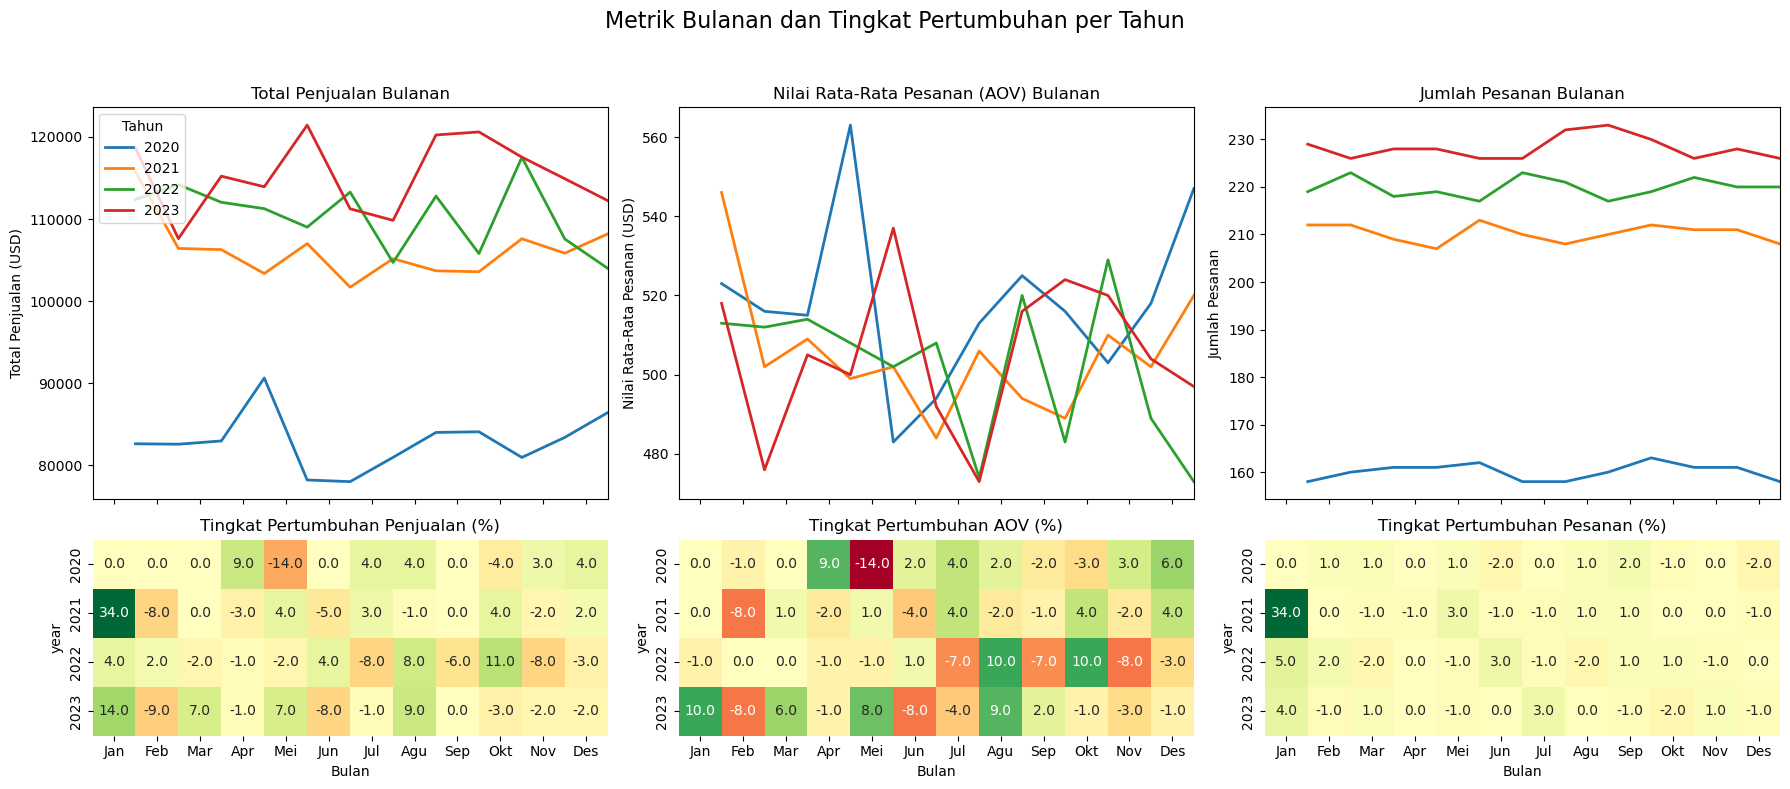

In [13]:
# Ekstrak tahun dan bulan dari indeks tanggal jika belum dilakukan
monthly_summary['year'] = monthly_summary.index.year
monthly_summary['month'] = monthly_summary.index.month

# Atur figur dengan grid 2x3: 3 grafik garis dan 3 heatmap
fig, axes = plt.subplots(2, 3, figsize=(18, 8), sharex='col', gridspec_kw={'height_ratios': [2, 1]})

# Tentukan warna untuk setiap tahun
years = monthly_summary['year'].unique()
colors = plt.cm.tab10(np.arange(len(years)))  # Gunakan palet warna tab10 untuk konsistensi; gaya sebelumnya terlalu gelap

# Metrik yang akan divisualisasikan
metrics = ['total_sales', 'avg_sales', 'total_orders']
titles = ['Total Penjualan Bulanan', 'Nilai Rata-Rata Pesanan (AOV) Bulanan', 'Jumlah Pesanan Bulanan']
y_labels = ['Total Penjualan (USD)', 'Nilai Rata-Rata Pesanan (USD)', 'Jumlah Pesanan']
growth_metrics = ['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate']
growth_titles = ['Tingkat Pertumbuhan Penjualan (%)', 'Tingkat Pertumbuhan AOV (%)', 'Tingkat Pertumbuhan Pesanan (%)']

# Plot grafik garis untuk setiap metrik
for i, (metric, title, y_label) in enumerate(zip(metrics, titles, y_labels)):
    for j, year in enumerate(years):
        yearly_data = monthly_summary[monthly_summary['year'] == year]
        axes[0, i].plot(yearly_data['month'], yearly_data[metric], label=f'{year}', color=colors[j], linewidth=2)
    axes[0, i].set_title(title)
    axes[0, i].set_ylabel(y_label)
    axes[0, i].set_xticks(range(1, 13))
    axes[0, i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
    if i == 0:
        axes[0, i].legend(title='Tahun', loc='upper left')

# Siapkan dan plot heatmap untuk tingkat pertumbuhan
for i, (growth_metric, growth_title) in enumerate(zip(growth_metrics, growth_titles)):
    growth_data = monthly_summary.pivot_table(index='year', columns='month', values=growth_metric)
    sns.heatmap(growth_data, cmap='RdYlGn', ax=axes[1, i], cbar=False, annot=True, fmt=".1f", center=0)
    axes[1, i].set_title(growth_title)
    axes[1, i].set_xticks(np.arange(0.5, 12))
    axes[1, i].set_xticklabels(['Jan', 'Feb', 'Mar', 'Apr', 'Mei', 'Jun', 'Jul', 'Agu', 'Sep', 'Okt', 'Nov', 'Des'])
    axes[1, i].set_xlabel('Bulan')

# Penyesuaian akhir tata letak
plt.suptitle('Metrik Bulanan dan Tingkat Pertumbuhan per Tahun', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


#### Metrik Triwulan
Menganalisis metrik utama setiap triwulan, seperti total penjualan, rata-rata nilai pesanan (AOV), dan tingkat pertumbuhan pesanan. Pemahaman terhadap tren ini memberikan wawasan mendalam mengenai pola musiman, dampak promosi, serta kondisi kesehatan bisnis seiring berjalannya waktu.

In [14]:
# Ringkasan Triwulan
quarterly_summary = df.groupby(df['purchase_ts'].dt.to_period('Q').rename('purchase_quarter')).agg(
    total_sales=('usd_price', 'sum'),  # Total penjualan per triwulan
    avg_sales=('usd_price', 'mean'),   # Rata-rata penjualan per triwulan
    total_orders=('order_id', 'count') # Total pesanan per triwulan
)

# Menghitung tingkat pertumbuhan triwulanan untuk setiap metrik
quarterly_summary['sales_growth_rate'] = quarterly_summary['total_sales'].pct_change() * 100  # Tingkat pertumbuhan penjualan
quarterly_summary['aov_growth_rate'] = quarterly_summary['avg_sales'].pct_change() * 100     # Tingkat pertumbuhan AOV (average order value)
quarterly_summary['order_growth_rate'] = quarterly_summary['total_orders'].pct_change() * 100 # Tingkat pertumbuhan pesanan

# Mengisi nilai NaN dengan 0, membulatkan hasil, dan mengonversi ke tipe integer
quarterly_summary = quarterly_summary.fillna(0).round(0).astype(int)

# Menerapkan latar belakang gradien dan pemformatan angka dengan koma
styled_quarterly_summary = quarterly_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],  # Menentukan kolom untuk gradient
    cmap="RdYlGn",  # Colormap dari Merah ke Kuning ke Hijau
    vmin=-100,      # Nilai minimum untuk warna merah
    vmax=100        # Nilai maksimum untuk warna hijau
)

# Menampilkan ringkasan triwulan yang sudah diberi gaya
styled_quarterly_summary


,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_quarter,,,,,,
2020Q1,"248,219",518,479,0,0,0
2020Q2,"246,912",513,481,-1,-1,0
2020Q3,"249,111",518,481,1,1,0
2020Q4,"250,840",523,480,1,1,0
2021Q1,"328,498",519,633,31,-1,32
2021Q2,"312,100",495,630,-5,-5,0
2021Q3,"312,474",496,630,0,0,0
2021Q4,"321,659",511,630,3,3,0
2022Q1,"338,624",513,660,5,0,5


#### Metrik Tahunan

In [15]:
# Ringkasan tahunan
yearly_summary = df.groupby(df['purchase_ts'].dt.to_period('Y').rename('purchase_year')).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Menghitung tingkat pertumbuhan tahunan untuk setiap metrik
yearly_summary['sales_growth_rate'] = yearly_summary['total_sales'].pct_change() * 100
yearly_summary['aov_growth_rate'] = yearly_summary['avg_sales'].pct_change() * 100
yearly_summary['order_growth_rate'] = yearly_summary['total_orders'].pct_change() * 100

# Mengisi nilai NaN dengan 0, membulatkan, dan mengonversi ke tipe integer
yearly_summary = yearly_summary.fillna(0).round(0).astype(int)

# Menerapkan gradien latar belakang dan format koma
styled_yearly_summary = yearly_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

# Menampilkan ringkasan tahunan yang telah diberi gaya
styled_yearly_summary

,total_sales,avg_sales,total_orders,sales_growth_rate,aov_growth_rate,order_growth_rate
purchase_year,,,,,,
2020,"995,082",518,"1,921",0,0,0
2021,"1,274,731",505,"2,523",28,-2,31
2022,"1,324,644",502,"2,638",4,-1,5
2023,"1,383,550",505,"2,738",4,1,4


---

## Analisis Regional dan Program Loyalti
### Tren Penjualan Regional
Melakukan analisa terhadap pola penjualan di berbagai wilayah untuk melihat perbedaan kinerja di tiap daerah dan menemukan peluang pertumbuhan yang ada. Wawasan yang didapat dari analisis ini dapat membantu dalam merancang strategi yang lebih tepat sasaran untuk ekspansi pasar serta upaya pemasaran yang lebih terpersonalisasi.

In [16]:
# Ringkasan tahunan yang dikelompokkan berdasarkan wilayah dan tahun
yearly_region_summary = df.groupby(['country_code', df['purchase_ts'].dt.to_period('Y').rename('purchase_year')]).agg(
    total_sales=('usd_price', 'sum'),
    avg_sales=('usd_price', 'mean'),
    total_orders=('order_id', 'count')
)

# Menghitung tingkat pertumbuhan untuk setiap metrik di setiap wilayah
yearly_region_summary['sales_growth_rate'] = yearly_region_summary.groupby('country_code')['total_sales'].pct_change() * 100
yearly_region_summary['aov_growth_rate'] = yearly_region_summary.groupby('country_code')['avg_sales'].pct_change() * 100
yearly_region_summary['order_growth_rate'] = yearly_region_summary.groupby('country_code')['total_orders'].pct_change() * 100

# Mengisi nilai NaN dengan 0, membulatkan, dan mengonversi menjadi integer
yearly_region_summary = yearly_region_summary.fillna(0).round(0).astype(int)

# Menerapkan gradien latar belakang dan format koma
styled_yearly_region_summary = yearly_region_summary.style.format("{:,}").background_gradient(
    subset=['sales_growth_rate', 'aov_growth_rate', 'order_growth_rate'],
    cmap="RdYlGn",
    vmin=-100,
    vmax=100
)

# Menampilkan ringkasan tahunan wilayah yang sudah diberi gaya
styled_yearly_region_summary


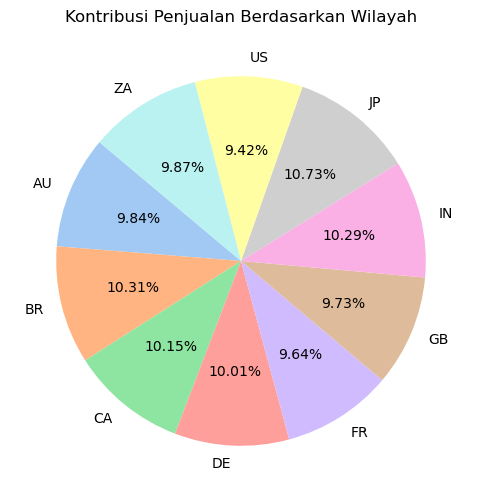

In [17]:
# Mengubah nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

# Menghitung kontribusi penjualan per country_code
sales_by_region = df.groupby('country_code')['usd_price'].sum()
sales_by_region_percentage = sales_by_region / sales_by_region.sum() * 100

# Visualisasi kontribusi penjualan
plt.figure(figsize=(10, 6))
sales_by_region_percentage.plot(kind='pie', autopct='%1.2f%%', startangle=140, colors=sns.color_palette("pastel"))
plt.title('Kontribusi Penjualan Berdasarkan Wilayah')
plt.ylabel('')  # Menghapus label Y
plt.show()


In [18]:
# Pastikan kolom 'purchase_ts' sudah dalam format datetime
df['purchase_ts'] = pd.to_datetime(df['purchase_ts'], errors='coerce')

# Menambahkan kolom 'Year' untuk memudahkan pemisahan data berdasarkan tahun
df['Year'] = df['purchase_ts'].dt.year

# Menghitung total penjualan per tahun untuk setiap negara
sales_by_year = df.groupby(['Year', 'country_code'])['usd_price'].sum().unstack()

# Menghitung pertumbuhan penjualan dari tahun sebelumnya (persentase perubahan)
sales_growth = sales_by_year.pct_change().fillna(0) * 100

# Gabungkan total penjualan dan pertumbuhan penjualan dalam satu dataframe
yearly_region_summary = pd.concat([sales_by_year, sales_growth], keys=['Total Sales (USD)', 'Sales Growth (%)'])

# Terapkan styling pada data yang sudah digabungkan
styled_yearly_region_summary = yearly_region_summary.style.format("{:,.2f}").background_gradient(
    subset=pd.IndexSlice[:, 'US':],  # Menambahkan subset untuk kolom negara
    cmap="RdYlGn",  # Color map
    vmin=-100, vmax=100  # Skala untuk gradien
)

# Menampilkan hasil dengan gaya
styled_yearly_region_summary


### Distribusi Penjualan Tahunan Berdasarkan 4 Negara Teratas

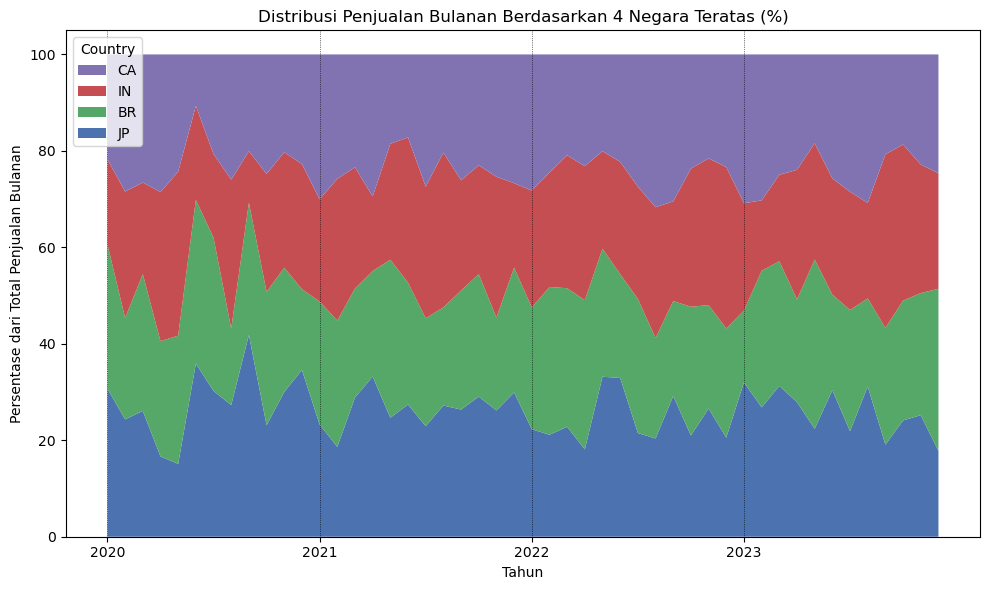

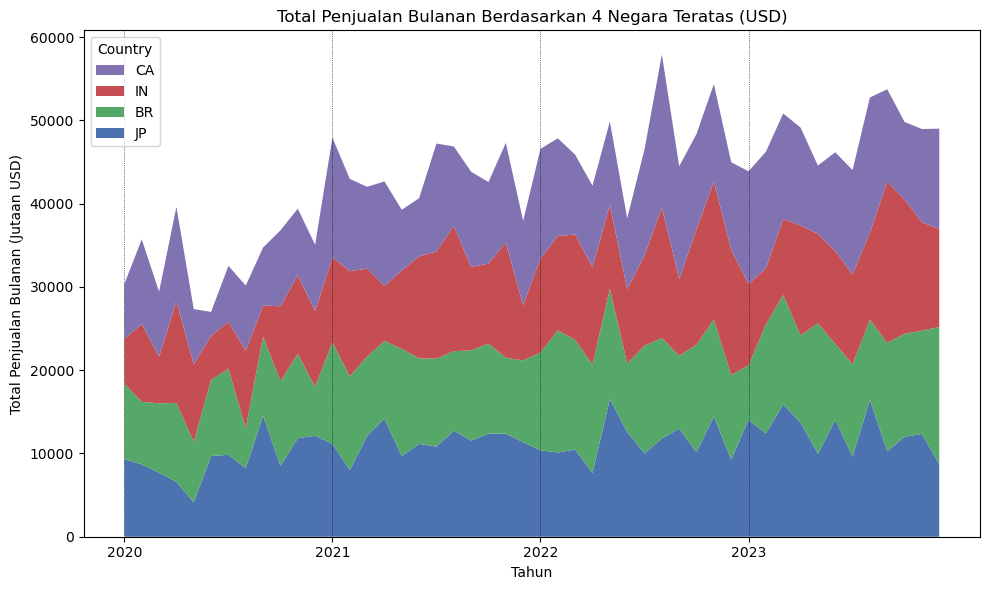

In [19]:
# Mengelompokkan data berdasarkan 'region' dan 'bulan' untuk menghitung total penjualan bulanan
monthly_sales = df.groupby([df['purchase_ts'].dt.to_period('M'), 'country_code'])['usd_price'].sum().unstack(fill_value=0)

# Menyaring 4 country_code dengan total penjualan terbanyak
top_4_countries = monthly_sales.sum(axis=0).nlargest(4).index
monthly_sales_top_4 = monthly_sales[top_4_countries]

# Menormalkan data untuk mendapatkan kontribusi persentase setiap wilayah per bulan
monthly_sales_percent = monthly_sales_top_4.div(monthly_sales_top_4.sum(axis=1), axis=0) * 100

# Mendefinisikan fungsi untuk menggambar grafik area bertumpuk dengan penanda tahunan dan label sumbu x tahunan
def plot_stacked_area(data, title, ylabel):
    plt.figure(figsize=(10, 6))
    plt.stackplot(data.index.astype(str), data.T, labels=data.columns)

    # Menambahkan garis vertikal di awal setiap tahun
    years = sorted(data.index.year.unique())
    for year in years:
        plt.axvline(x=f'{year}-01', color='black', linestyle=':', linewidth=0.5)

    # Membalik urutan legenda agar sesuai dengan urutan tumpukan
    handles, labels = plt.gca().get_legend_handles_labels()
    plt.legend(handles[::-1], labels[::-1], loc='upper left', title='Country')

    # Menetapkan judul dan label
    plt.title(title)
    plt.xlabel('Tahun')
    plt.ylabel(ylabel)

    # Menampilkan hanya tahun pada label sumbu x
    plt.xticks([f"{year}-01" for year in years], [str(year) for year in years])

    plt.tight_layout()
    plt.show()

# Menggambar grafik area bertumpuk persentase untuk 4 country_code terbanyak
plt.style.use('seaborn-v0_8-deep')
plot_stacked_area(
    monthly_sales_percent,
    title='Distribusi Penjualan Bulanan Berdasarkan 4 Negara Teratas (%)',
    ylabel='Persentase dari Total Penjualan Bulanan'
)

# Menggambar grafik area bertumpuk untuk total penjualan dari 4 country_code terbanyak
plot_stacked_area(
    monthly_sales_top_4,
    title='Total Penjualan Bulanan Berdasarkan 4 Negara Teratas (USD)',
    ylabel='Total Penjualan Bulanan (Jutaan USD)'
)


### Analisis Pengaruh Program Loyalty
Mengevaluasi pengaruh program loyalti terhadap metrik utama seperti pendapatan, volume pesanan, rata-rata nilai pesanan (Average Order Value). Analisis ini membantu untuk menilai seberapa efektif program loyalti dalam meningkatkan keterlibatan pelanggan dan pembelian ulang.

In [20]:
# Menghitung metrik tahunan yang dikelompokkan berdasarkan tahun pembelian dan program loyalti
df_yearly_loyalty = df.groupby(['loyalty_program', df['purchase_ts'].dt.to_period('Y').rename('purchase_year')]).agg(
    revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    aov=('usd_price', 'mean')
)

# Menghitung tingkat pertumbuhan sebagai persentase untuk setiap metrik dalam setiap program loyalti
df_yearly_loyalty['revenue_growth'] = df_yearly_loyalty.groupby('loyalty_program')['revenue'].pct_change() * 100
df_yearly_loyalty['order_count_growth'] = df_yearly_loyalty.groupby('loyalty_program')['order_count'].pct_change() * 100
df_yearly_loyalty['aov_growth'] = df_yearly_loyalty.groupby('loyalty_program')['aov'].pct_change() * 100

# Mengisi nilai NaN dengan 0, membulatkan untuk menghilangkan desimal, dan mengonversi ke integer
df_yearly_loyalty = df_yearly_loyalty.fillna(0).round(0).astype(int)

# Menerapkan gradien latar belakang dan format pemisah koma untuk keterbacaan yang lebih baik
styled_df_yearly_loyalty = df_yearly_loyalty.style.format("{:,}").background_gradient(
    subset=['revenue_growth', 'order_count_growth', 'aov_growth'],
    cmap="RdYlGn",  # Warna dari Merah ke Kuning ke Hijau
    vmin=-100,      # Menetapkan nilai minimum untuk merah/oranye di ujung kiri
    vmax=100        # Menetapkan nilai maksimum untuk hijau di ujung kanan
)

# Menampilkan DataFrame yang sudah diberi gaya
styled_df_yearly_loyalty


In [21]:
# Agregasi metrik tahunan yang dikelompokkan berdasarkan tahun pembelian dan program loyalitas
df_yearly_loyalty = df.groupby(['loyalty_program', df['purchase_ts'].dt.to_period('Y').rename('purchase_year')]).agg(
    revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    aov=('usd_price', 'mean')
)

# Menghitung tingkat pertumbuhan sebagai persentase untuk setiap metrik dalam setiap program loyalitas
df_yearly_loyalty['revenue_growth'] = df_yearly_loyalty.groupby('loyalty_program')['revenue'].pct_change() * 100
df_yearly_loyalty['order_count_growth'] = df_yearly_loyalty.groupby('loyalty_program')['order_count'].pct_change() * 100
df_yearly_loyalty['aov_growth'] = df_yearly_loyalty.groupby('loyalty_program')['aov'].pct_change() * 100

# Mengisi nilai NaN dengan 0, membulatkan untuk menghilangkan desimal, dan mengonversi menjadi integer
df_yearly_loyalty = df_yearly_loyalty.fillna(0).round(0).astype(int)

# Menerapkan gradien latar belakang dan format terpisah koma untuk keterbacaan yang lebih baik
styled_df_yearly_loyalty = df_yearly_loyalty.style.format("{:,}").background_gradient(
    subset=['revenue_growth', 'order_count_growth', 'aov_growth'],
    cmap="RdYlGn",  # Palet warna dari Merah ke Kuning ke Hijau
    vmin=-100,      # Menetapkan nilai minimum untuk merah/oranye di sisi kiri
    vmax=100        # Menetapkan nilai maksimum untuk hijau di sisi kanan
)

# Menampilkan DataFrame yang sudah diberi gaya
styled_df_yearly_loyalty


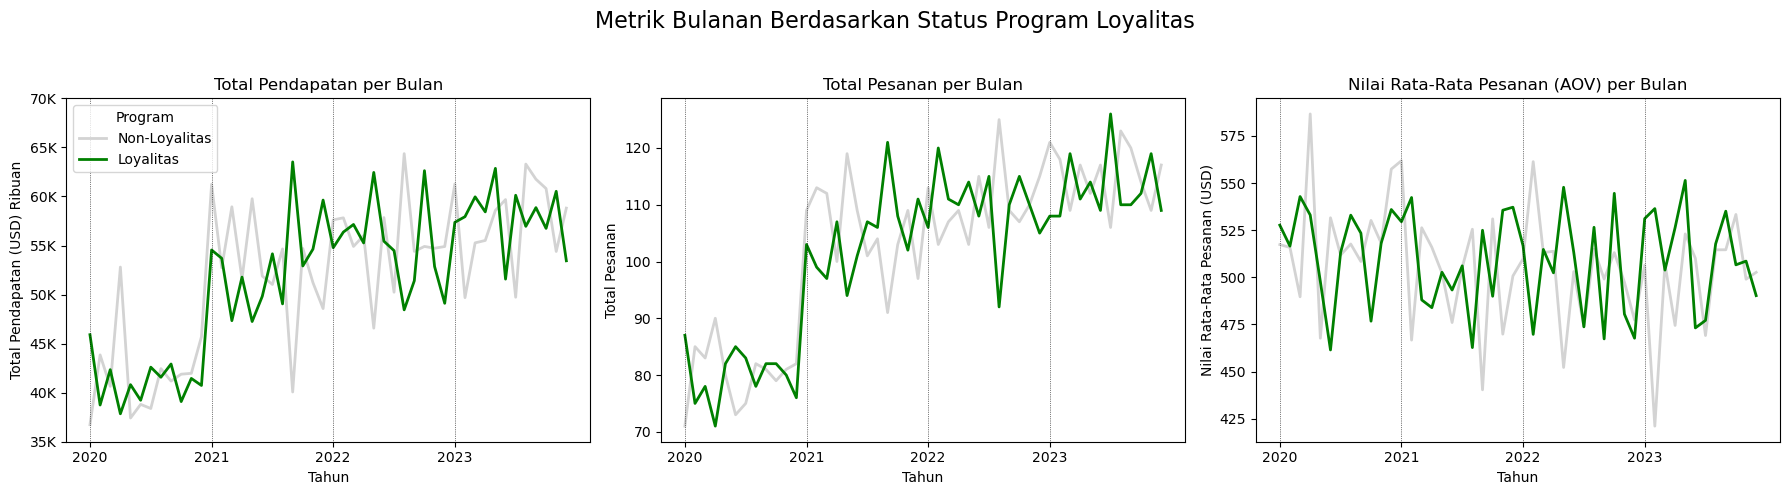

In [27]:
from matplotlib.ticker import FixedLocator

# Mengelompokkan berdasarkan loyalty_program dan bulan, dengan format 'YYYY-MM' sebagai periode
df_monthly_loyalty = df.groupby(['loyalty_program', df['purchase_ts'].dt.to_period('M').rename('purchase_month')]).agg(
    revenue=('usd_price', 'sum'),
    order_count=('order_id', 'count'),
    aov=('usd_price', 'mean')
).reset_index()

# Menyiapkan gambar dengan grid 1x3: 3 grafik garis untuk metrik
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# Menentukan warna untuk program loyalitas dan non-loyalitas
programs = df_monthly_loyalty['loyalty_program'].unique()
colors = {0: 'lightgrey', 1: 'green'}  # Non-loyalitas = abu-abu terang, Loyalitas = hijau

# Metrik dan judul untuk pemetaan
metrics = ['revenue', 'order_count', 'aov']
titles = ['Total Pendapatan per Bulan', 'Total Pesanan per Bulan', 'Nilai Rata-Rata Pesanan (AOV) per Bulan']
y_labels = ['Total Pendapatan (USD) Ribuan', 'Total Pesanan', 'Nilai Rata-Rata Pesanan (USD)']

# Membuat grafik garis untuk setiap metrik per bulan
for i, (metric, title, y_label) in enumerate(zip(metrics, titles, y_labels)):
    for program in programs:
        data = df_monthly_loyalty[df_monthly_loyalty['loyalty_program'] == program]
        axes[i].plot(data['purchase_month'].astype(str), data[metric],
                     label='Loyalitas' if program == 1 else 'Non-Loyalitas',
                     color=colors[program], linewidth=2)
    axes[i].set_title(title)
    axes[i].set_ylabel(y_label)
    axes[i].set_xlabel('Tahun')
    
    # Menampilkan hanya tahun pada label sumbu x
    years = sorted(data['purchase_month'].dt.year.unique())
    axes[i].set_xticks([f"{year}-01" for year in years])
    axes[i].set_xticklabels([str(year) for year in years])
    
    # Menambahkan garis vertikal untuk menandai awal setiap tahun
    for year in years:
        axes[i].axvline(x=f"{year}-01", color='black', linestyle=':', linewidth=0.5)

    # Mengatur format label sumbu y untuk pendapatan dalam ribuan (misalnya, 800000 -> 800K)
    if metric == 'revenue':
        y_ticks = axes[i].get_yticks()
        axes[i].set_yticks(y_ticks)  # Menetapkan lokasi tick yang sama
        axes[i].set_yticklabels([f'{int(y/1000)}K' for y in y_ticks])  # Mengubah label tick
    
    if i == 0:
        axes[i].legend(title='Program', loc='upper left')

# Penyesuaian tata letak akhir
plt.suptitle('Metrik Bulanan Berdasarkan Status Program Loyalitas', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


In [32]:
# Mengubah kolom 'created_on' menjadi tipe datetime
df['created_on'] = pd.to_datetime(df['created_on'])

# Menambahkan kolom 'first_purchase_date' yang diisi dengan tanggal pembelian pertama (misalnya, kita buat seolah-olah anggota loyalitas membeli lebih cepat)
df['first_purchase_date'] = df['created_on'] + pd.to_timedelta(np.random.randint(30, 90, size=len(df)), unit='D')

# Hitung waktu yang dibutuhkan untuk pembelian pertama dalam hari
df['days_to_first_purchase'] = (df['first_purchase_date'] - df['created_on']).dt.days

# Menghitung rata-rata waktu pembelian pertama untuk anggota loyalitas dan non-loyalitas
loyalty_stats = df.groupby('loyalty_program')['days_to_first_purchase'].agg(['mean', 'count'])

# Menerapkan gradien latar belakang dan format pada DataFrame
styled_summary = loyalty_stats.style.format({
    'mean': "{:.2f}",  # Format untuk nilai mean
    'count': "{:,}"     # Format untuk count
}).background_gradient(
    subset=['mean'],  # Gradien pada kolom 'mean'
    cmap="YlGnBu",    # Gradien dari kuning ke biru muda
    vmin=0            # Nilai minimum untuk gradien
)

# Menampilkan DataFrame dengan styling
styled_summary


,mean,count
loyalty_program,,
0,59.76,"4,934"
1,59.82,"4,886"


### Analisis Dampak Program Loyalti terhadap Volume Pesanan

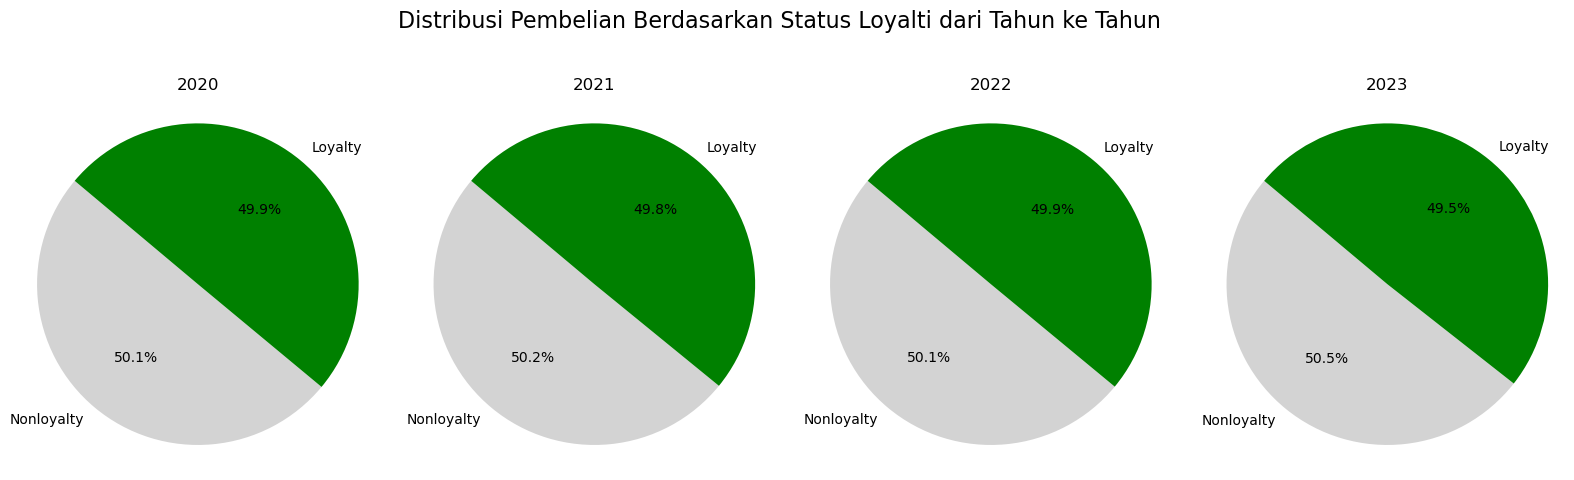

In [22]:
# Membuat DataFrame dengan jumlah pesanan berdasarkan status loyalti dan tahun
loyalty_pie_data = df.groupby([df['purchase_ts'].dt.year.rename('year'), 'loyalty_program'])['order_id'].count().unstack()

# Menyiapkan grid subplot (satu untuk setiap tahun)
num_years = loyalty_pie_data.shape[0]
fig, axes = plt.subplots(1, num_years, figsize=(4 * num_years, 5))

# Menentukan warna untuk 'Loyalty' dan 'Nonloyalty'
colors = ['lightgrey', 'green']  # Nonloyalty = abu-abu terang, Loyalty = hijau

# Melakukan loop untuk setiap tahun dan membuat diagram pai di setiap subplot
for i, (year, data) in enumerate(loyalty_pie_data.iterrows()):
    ax = axes[i] if num_years > 1 else axes  # Menangani kasus ketika hanya ada satu subplot
    ax.pie(data, labels=['Nonloyalty', 'Loyalty'], autopct='%1.1f%%', startangle=140, colors=colors)
    ax.set_title(int(year))  # Menampilkan tahun sebagai integer saja
    ax.axis('equal')  # Rasio aspek yang sama memastikan diagram pai berbentuk lingkaran

# Menambahkan judul utama
fig.suptitle('Distribusi Pembelian Berdasarkan Status Loyalti dari Tahun ke Tahun', fontsize=16)

# Menyesuaikan tata letak untuk tampilan yang lebih rapi
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Memberi ruang untuk judul utama
plt.show()



---

### Analisis Performa Produk
Melakukan evaluasi terhadap kinerja setiap produk dengan fokus pada metrik utama seperti total pendapatan, rata-rata nilai pesanan (AOV), jumlah pesanan, dan tingkat pengembalian. Analisis ini membantu mengidentifikasi produk-produk yang berkinerja terbaik serta menemukan peluang untuk perbaikan produk di masa depan.

In [23]:
# Agregasi untuk setiap produk dengan perhitungan inline untuk persentase
product_performance = df.groupby('product_name').agg(
    total_revenue=('usd_price', 'sum'),
    total_revenue_pct=('usd_price', lambda x: x.sum() / df['usd_price'].sum() * 100),
    aov=('usd_price', 'mean'),
    order_count=('order_id', 'count'),
    order_count_pct=('order_id', lambda x: x.count() / df['order_id'].count() * 100),
)

# Mengurutkan berdasarkan Total Revenue secara menurun
product_performance = product_performance.sort_values(by='total_revenue', ascending=False)

# Membulatkan nilai menjadi dua angka desimal
product_performance = product_performance.round(2)

# Menerapkan gradien latar belakang dan format koma dengan warna yang lebih terang
styled_product_performance = product_performance.style.format("{:,.2f}").background_gradient(
    subset=['aov', 'total_revenue_pct', 'order_count_pct'],
    cmap="YlGnBu",  # Gradien dari kuning ke biru muda (lebih terang)
    vmin=0
)

# Menampilkan DataFrame yang sudah diberi gaya
styled_product_performance


,total_revenue,total_revenue_pct,aov,order_count,order_count_pct
product_name,,,,,
Smart TV,"181,253.00",3.64,531.53,341.00,3.47
Streaming Microphone,"179,712.00",3.61,516.41,348.00,3.54
Security Camera,"179,692.00",3.61,492.31,365.00,3.72
Mini Projector,"178,354.00",3.58,512.51,348.00,3.54
External SSD,"176,392.00",3.54,531.30,332.00,3.38
4K Projector,"173,493.00",3.49,507.29,342.00,3.48
Network Switch,"173,407.00",3.48,522.31,332.00,3.38
NAS Storage,"173,076.00",3.48,518.19,334.00,3.40
Dash Cam,"172,761.00",3.47,515.70,335.00,3.41


In [47]:
# Pastikan kolom usd_price numerik
df['usd_price'] = pd.to_numeric(df['usd_price'], errors='coerce')
df = df.dropna(subset=['usd_price'])

# Pisahkan data anggota loyalitas dan non-loyalitas
loyalty_data = df[df['loyalty_program'] == 1]
non_loyalty_data = df[df['loyalty_program'] == 0]

# Hitung metrik untuk data anggota loyalitas per country_code
loyalty_metrics = loyalty_data.groupby('country_code').agg(
    total_revenue=('usd_price', 'sum'),
    total_orders=('usd_price', 'count'),
    average_order_value=('usd_price', 'mean')
).reset_index()

# Hitung metrik untuk data non-anggota loyalitas per country_code
non_loyalty_metrics = non_loyalty_data.groupby('country_code').agg(
    total_revenue=('usd_price', 'sum'),
    total_orders=('usd_price', 'count'),
    average_order_value=('usd_price', 'mean')
).reset_index()

# Gabungkan hasil untuk perbandingan
comparison = pd.merge(loyalty_metrics, non_loyalty_metrics, on='country_code', suffixes=('_loyalty', '_non_loyalty'))

# Tambahkan persentase kontribusi anggota loyalitas terhadap pendapatan dan pesanan
comparison['loyalty_revenue_percentage'] = (
    comparison['total_revenue_loyalty'] /
    (comparison['total_revenue_loyalty'] + comparison['total_revenue_non_loyalty']) * 100
)
comparison['loyalty_order_percentage'] = (
    comparison['total_orders_loyalty'] /
    (comparison['total_orders_loyalty'] + comparison['total_orders_non_loyalty']) * 100
)

# Tampilkan hasil analisis dengan styling
styled_comparison = comparison.style.format(
    {
        'total_revenue_loyalty': "{:,.2f}",
        'average_order_value_loyalty': "{:,.2f}",
        'total_revenue_non_loyalty': "{:,.2f}",
        'average_order_value_non_loyalty': "{:,.2f}",
        'loyalty_revenue_percentage': "{:,.2f}",
        'loyalty_order_percentage': "{:,.2f}"
    }
).format(
    {
        'total_orders_loyalty': "{:,}",
        'total_orders_non_loyalty': "{:,}"
    }
).background_gradient(
    subset=['average_order_value_loyalty', 'average_order_value_non_loyalty',
            'loyalty_revenue_percentage', 'loyalty_order_percentage'],
    cmap="YlGnBu"
)

# Tampilkan DataFrame yang sudah diberi gaya
styled_comparison


,country_code,total_revenue_loyalty,total_orders_loyalty,average_order_value_loyalty,total_revenue_non_loyalty,total_orders_non_loyalty,average_order_value_non_loyalty,loyalty_revenue_percentage,loyalty_order_percentage
0,AU,226168,460,491.669565,263776,516,511.193798,46.162010,47.131148
1,BR,254492,519,490.350674,258799,500,517.598000,49.580452,50.932287
2,CA,257066,496,518.278226,248324,474,523.890295,50.864877,51.134021
3,DE,246936,485,509.146392,251178,520,483.034615,49.574194,48.258706
4,FR,238921,466,512.706009,240896,507,475.140039,49.794192,47.893114
5,GB,236879,465,509.417204,247699,476,520.376050,48.883565,49.415515
6,IN,249077,493,505.227181,263137,507,519.007890,48.627527,49.300000
7,JP,280354,545,514.411009,254010,507,501.005917,52.464986,51.806084
8,US,250397,484,517.349174,218735,443,493.758465,53.374530,52.211435
9,ZA,246402,473,520.934461,244761,484,505.704545,50.167052,49.425287


### Repeat Rate Customer

In [25]:
# Mengubah nama kolom menjadi huruf kecil
df.columns = df.columns.str.lower()

# Mengubah kolom 'PURCHASE_TS' menjadi datetime
df['purchase_ts'] = pd.to_datetime(df['purchase_ts'])

# Membuat kolom 'purchase_year' untuk tahun pembelian
df['purchase_year'] = df['purchase_ts'].dt.year

# Hitung Unique Customers
unique_customers = df.groupby('purchase_year')['user_id'].nunique().reset_index()
unique_customers.columns = ['purchase_year', 'unique_customers']

# Hitung Repeat Customers
repeat_customers = (
    df.groupby(['purchase_year', 'user_id'])
      .size()
      .reset_index(name='order_count')
)
repeat_customers = repeat_customers[repeat_customers['order_count'] > 1]
repeat_customers_count = repeat_customers.groupby('purchase_year')['user_id'].nunique().reset_index()
repeat_customers_count.columns = ['purchase_year', 'repeat_customers']

# Gabungkan Unique dan Repeat Customers
summary = pd.merge(unique_customers, repeat_customers_count, on='purchase_year', how='left')
summary['repeat_customers'] = summary['repeat_customers'].fillna(0).astype(int)

# Hitung Repeat Rate
summary['repeat_rate'] = (summary['repeat_customers'] / summary['unique_customers']) * 100

# Format Repeat Rate dengan dua angka di belakang koma
summary['repeat_rate'] = summary['repeat_rate'].round(2)

# Menerapkan gradien latar belakang dan format pada DataFrame
styled_summary = summary.style.format({
    'repeat_rate': "{:.2f}",
    'unique_customers': "{:,}",
    'repeat_customers': "{:,}"
}).background_gradient(
    subset=['repeat_rate'], 
    cmap="YlGnBu",  # Gradien dari kuning ke biru muda
    vmin=0
)

styled_summary


,purchase_year,unique_customers,repeat_customers,repeat_rate
0,2020,809,560,69.22
1,2021,852,677,79.46
2,2022,860,728,84.65
3,2023,852,724,84.98
